# location based Recommendation system
1. used kmean clustering
2. yelp dataset from kaggle
3. gdal - used for data transmission of geograpical data in python libraris
4. geopandas - it add map support to pandas object
5. descartes - it help in making interactive catesian plane
6. folium - python package built in javascript,used for visualzing the geograpical data and hovering effect.
7.plottly_express - it is better version of matplotlib(static visualization) ,it make more interactive visualization.
8. rtree - it is a spatial data structure used for organizing and indexing multi-dimensional data, particularly in applications involving spatial searching, such as geographic information systems (GIS), computer vision, and machine learning.


In [ ]:
# installing libraries
!apt install gdal_bin python-gdal python3_gdal
!apt install python3-rtree
!pip install git+git://github.com/geopandas/geopandas.git
!pip install descartes
!pip install folium
!pip install plotly_express

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Package python-gdal is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source
However the following packages replace it:
  gdal-bin

E: Unable to locate package gdal_bin
E: Package 'python-gdal' has no installation candidate
E: Unable to locate package python3_gdal
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-rtree is already the newest version (0.9.7-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-m6cnr_cm
  Running command git clone --filter=blob:none --quiet git://github.com/geopandas/geopandas.git /tmp/pip-req-build-m6cnr_cm
  fatal: unable to connect to github.com:
  github.com[0: 140.82.113.4]: errno=Connection timed out

  error: su

In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly
import plotly.offline as py
import plotly.graph_objs as go
import plotly_express as px
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
df = pd.read_csv('/content/surat_mechanics_with_contact.csv')
df.head()

,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,contact_number
0,Surat Car Garage 4,433 Jill Springs,Surat,Gujarat,395005,21.174489,72.770931,2.3,384,0,9348273707
1,Speedy Motors 5,386 Shane Harbors,Surat,Gujarat,395001,21.159370,72.784899,3.8,292,0,8514008085
2,Speedy Motors 29,16155 Roman Stream Suite 816,Surat,Gujarat,395008,21.208927,72.871415,2.0,417,0,8205164011
3,Royal Auto Solutions 36,1316 Chavez Village,Surat,Gujarat,395003,21.171531,72.864524,2.3,199,0,8724149994
4,Royal Auto Solutions 78,283 Steven Groves,Surat,Gujarat,395005,21.230713,72.859460,3.6,477,1,7528926338


In [ ]:
df.shape

(2000, 11)

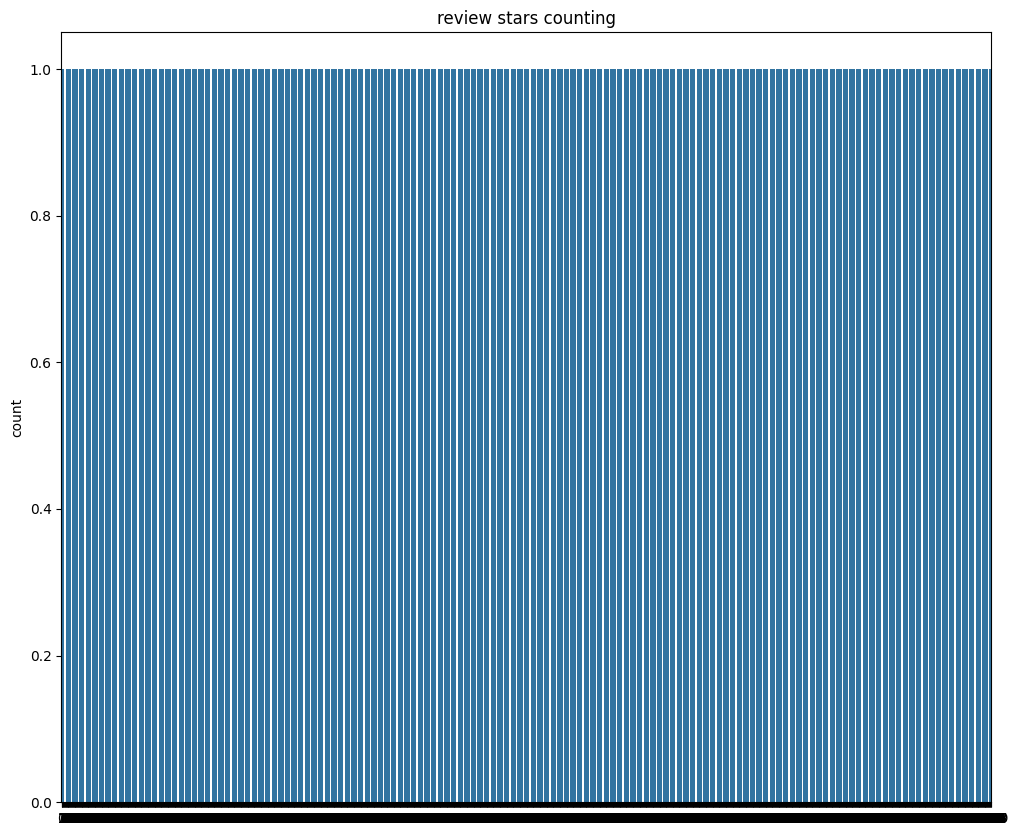

In [ ]:
fig,ax = plt.subplots(figsize=(12,10))
sns.countplot(df['stars'], ax=ax)
plt.title('review stars counting')
# plt.savefig('starcount.png')
plt.show()

In [ ]:
t_m = df.sort_values(by=['review_count','stars'],ascending=False)
t_m.head()

,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,contact_number
960,Surat Car Garage 79,19947 Cody Vista,Surat,Gujarat,395005,21.230841,72.783172,4.9,500,1,8750570693
513,Jai Hind Auto Repairs 58,USCGC Smith,Surat,Gujarat,395003,21.167915,72.892307,4.0,500,0,8246064267
169,Jai Hind Auto Repairs 43,258 Mullen Fort,Surat,Gujarat,395002,21.208274,72.771214,3.0,500,1,8314300370
1055,Perfect Wheels Garage 55,34808 Deleon Junctions,Surat,Gujarat,395003,21.232975,72.787931,2.9,500,1,7239040114
949,Gujarat Car Care 53,78192 Courtney Loop,Surat,Gujarat,395008,21.158391,72.845370,2.6,500,0,9246545961


In [ ]:
t_m = t_m.reset_index(drop=True)
t_m

,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,contact_number
0,Surat Car Garage 79,19947 Cody Vista,Surat,Gujarat,395005,21.230841,72.783172,4.9,500,1,8750570693
1,Jai Hind Auto Repairs 58,USCGC Smith,Surat,Gujarat,395003,21.167915,72.892307,4.0,500,0,8246064267
2,Jai Hind Auto Repairs 43,258 Mullen Fort,Surat,Gujarat,395002,21.208274,72.771214,3.0,500,1,8314300370
3,Perfect Wheels Garage 55,34808 Deleon Junctions,Surat,Gujarat,395003,21.232975,72.787931,2.9,500,1,7239040114
4,Gujarat Car Care 53,78192 Courtney Loop,Surat,Gujarat,395008,21.158391,72.845370,2.6,500,0,9246545961
...,...,...,...,...,...,...,...,...,...,...,...
1995,Krishna Auto Works 100,3167 Leslie Center,Surat,Gujarat,395004,21.208894,72.845240,4.3,5,1,7938057241
1996,Gujarat Car Care 48,505 Giles Spur Suite 692,Surat,Gujarat,395003,21.235333,72.893110,3.7,5,1,8857145077
1997,Royal Auto Solutions 98,"PSC 8208, Box 1219",Surat,Gujarat,395003,21.203938,72.866794,3.6,5,1,9237707366
1998,Sai Baba Car Clinic 45,8839 Compton Landing Suite 082,Surat,Gujarat,395007,21.174697,72.884266,2.5,5,0,9955044654


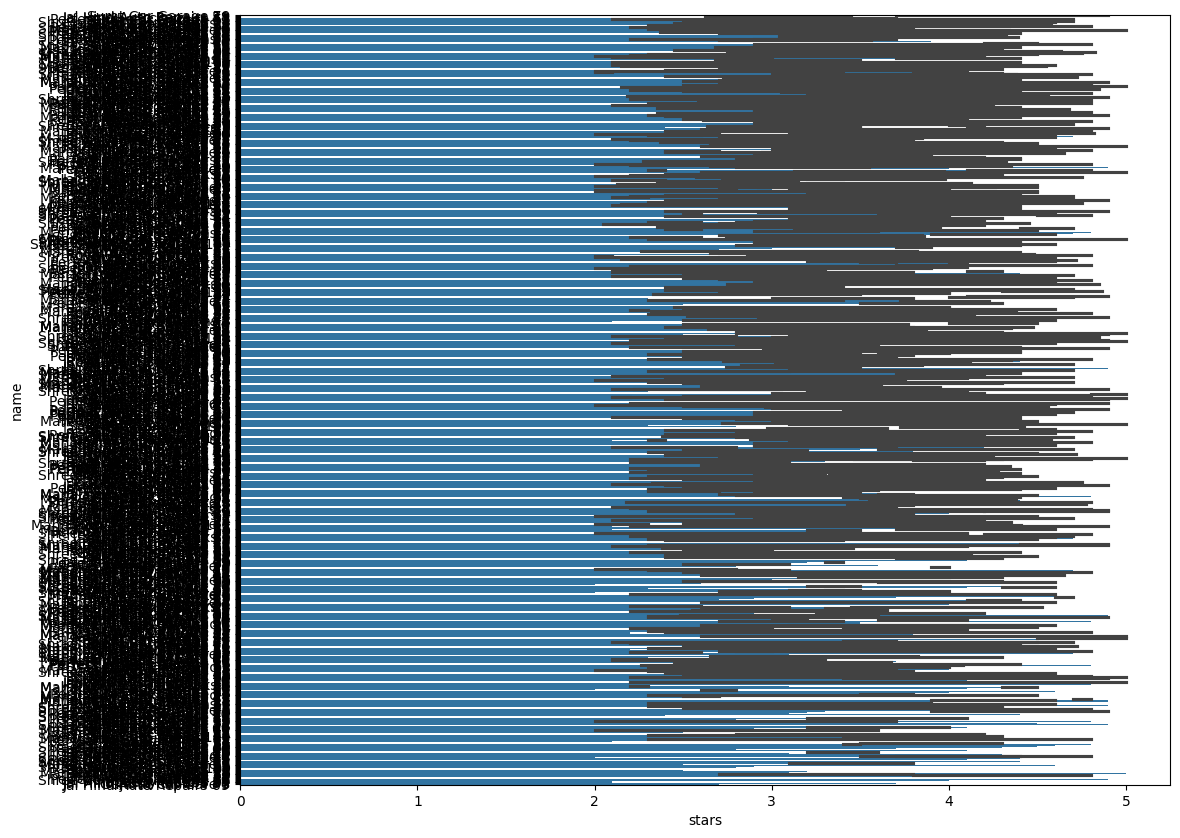

In [ ]:
fig,ax = plt.subplots(figsize=(12,10))
sns.barplot(x='stars',y='name',data=t_m,ax= ax);
plt.show()

In [ ]:
px.set_mapbox_access_token("pk.eyJ1IjoidmlyZW5kcmEyMyIsImEiOiJjbThsYmd5dHExNXQ0MmpzNXpwZ2U1Zmh1In0.WKDV1ghfFdkaqTtZQuAfnw")
px.scatter_mapbox(t_m,lat='latitude',lon='longitude',color='stars',size='review_count',size_max=30,zoom=15,width=1200,height=1000)

K Mean Clustering
1. if c1,c2,c3 are clusters ,then distortions of 1st cluster = (d[1,2]+d[1,3])/2
2.  Interia - (d[1,2]^2+d[2,3]^2+d[3,1]^2)/3

In [ ]:
coords = t_m[['longitude','latitude']]
interias=[]
K=range(1,8)
for k in K:
  kmeansModel = KMeans(n_clusters=k)
  kmeansModel =kmeansModel.fit(coords)
  interias.append(kmeansModel.inertia_)

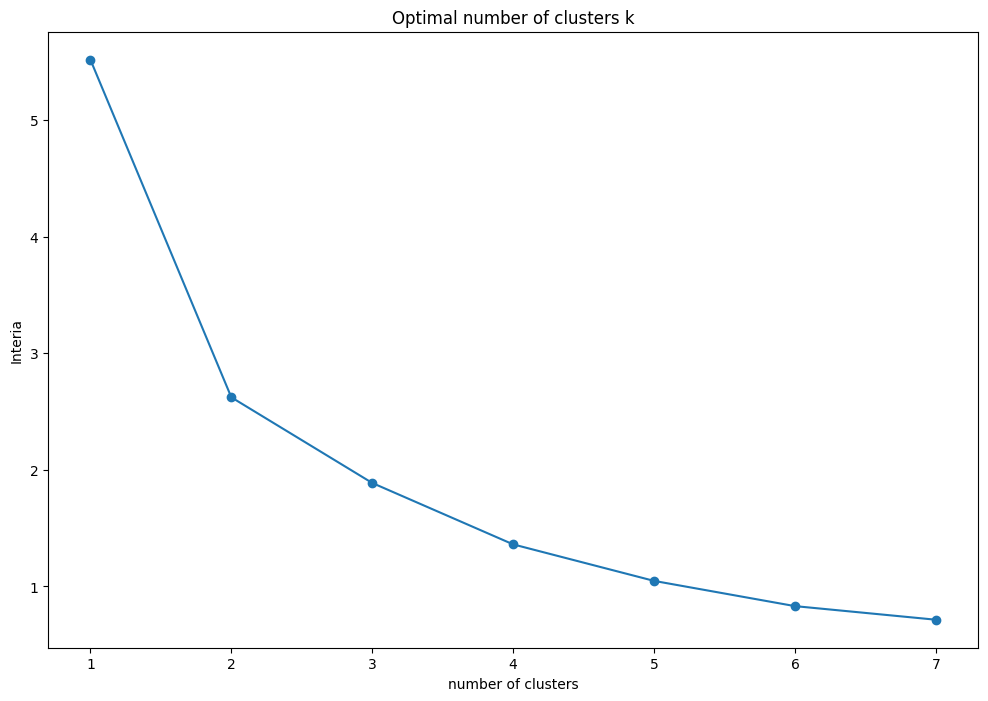

In [ ]:
fig,ax = plt.subplots(figsize=(12,8))
plt.plot(K,interias,marker='o')
plt.xlabel('number of clusters')
plt.ylabel('Interia')
plt.title('Optimal number of clusters k')
plt.show()

# Silhouette_score
-how much a point belong to its cluster as compare to other clusters .
-1<s<1,

 1) 1-well separated,Tight clusters

2)-1-overlapped cluster

In [ ]:
from sklearn.metrics import silhouette_score
sil=[]
for k in range(2,8):
  kmeans = KMeans(n_clusters =k ).fit(coords)
  labels = kmeans.labels_
  sil.append(silhouette_score(coords,labels,metric='euclidean'))

In [ ]:
sil


[np.float64(0.44310871384160755),
 np.float64(0.3876047763291508),
 np.float64(0.3820672009719071),
 np.float64(0.3941830637634229),
 np.float64(0.39056687101346266),
 np.float64(0.37639359869097805)]

In [ ]:
# Best k value is 6
kmeans =KMeans(n_clusters=6,init='k-means++')
kmeans.fit(coords)
y = kmeans.labels_
print("k=6",silhouette_score(coords,y,metric ='euclidean'))


k=6 0.392978677718639


In [ ]:
t_m['cluster'] = kmeans.predict(t_m[['longitude','latitude']])
t_m = t_m.reset_index(drop=True)
t_m.to_csv("Mechanic_dataset.csv")
t_m

,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,contact_number,cluster
0,Surat Car Garage 79,19947 Cody Vista,Surat,Gujarat,395005,21.230841,72.783172,4.9,500,1,8750570693,3
1,Jai Hind Auto Repairs 58,USCGC Smith,Surat,Gujarat,395003,21.167915,72.892307,4.0,500,0,8246064267,4
2,Jai Hind Auto Repairs 43,258 Mullen Fort,Surat,Gujarat,395002,21.208274,72.771214,3.0,500,1,8314300370,3
3,Perfect Wheels Garage 55,34808 Deleon Junctions,Surat,Gujarat,395003,21.232975,72.787931,2.9,500,1,7239040114,3
4,Gujarat Car Care 53,78192 Courtney Loop,Surat,Gujarat,395008,21.158391,72.845370,2.6,500,0,9246545961,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Krishna Auto Works 100,3167 Leslie Center,Surat,Gujarat,395004,21.208894,72.845240,4.3,5,1,7938057241,1
1996,Gujarat Car Care 48,505 Giles Spur Suite 692,Surat,Gujarat,395003,21.235333,72.893110,3.7,5,1,8857145077,2
1997,Royal Auto Solutions 98,"PSC 8208, Box 1219",Surat,Gujarat,395003,21.203938,72.866794,3.6,5,1,9237707366,2
1998,Sai Baba Car Clinic 45,8839 Compton Landing Suite 082,Surat,Gujarat,395007,21.174697,72.884266,2.5,5,0,9955044654,4


In [ ]:
px.scatter_mapbox(t_m, lat='latitude', lon='longitude',color="cluster",size='review_count',
                  hover_data =['name','contact_number','stars','review_count'],zoom=15,width=1200,height=800)

Building the Recommendation function

In [ ]:
def recommend(df,longitude,latitude):
  cluster = kmeans.predict(np.array([longitude,latitude]).reshape(1,-1))[0]
  print(cluster)
 #  get best resturand in cluster
  return df[df['cluster']==cluster].iloc[0:6][['name','contact_number','stars','review_count','address','city']]## Filter the DataFrame to get top restaurants in the same cluster -- only top 5 with details given y


In [ ]:
recommend(t_m,72,21)

5


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



,name,contact_number,stars,review_count,address,city
6,Surat Car Garage 37,7670488648,3.7,499,28140 Williamson Forges Suite 515,Surat
22,Surat Car Garage 86,9190738286,2.4,496,5855 Mueller Ramp,Surat
28,Speedy Motors 28,7839409405,4.0,494,1186 Amanda Isle,Surat
33,Gujarat Car Care 50,7974395329,2.9,493,7967 Stephanie Grove,Surat
34,Surat Car Garage 38,8887914009,3.7,492,018 Suzanne Harbor Apt. 397,Surat
36,Speedy Motors 60,9361470099,4.4,491,3428 Nicholas Glens,Surat


In [ ]:
import pickle
with open("kmeans_Hack.pkl", "wb") as file:
    pickle.dump(kmeans, file)